## Làm sạch dữ liệu (Xử lý giá trị thiếu, ngoại lai).

In [209]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [210]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df = pd.read_csv("sample/bds_hn_data.csv")
df

,page,published_date,price,area,price_per_m2,bedroom,wc,location,home_type,legal_status,furniture
0,1,07/10/2025,4.72,75.0,63.00,3.0,2.0,"Gia Lâm, Hà Nội",căn hộ chung cư,Sổ đỏ/ Sổ hồng,Đầy đủ
1,1,07/10/2025,4.28,72.0,59.50,NaN,NaN,"Đông Anh, Hà Nội",đất,NaN,NaN
2,1,07/10/2025,38.30,288.0,133.00,NaN,NaN,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",NaN,NaN
3,1,07/10/2025,2.75,43.0,63.95,1.0,NaN,"Gia Lâm, Hà Nội",căn hộ chung cư,Sổ đỏ/ Sổ hồng,NaN
4,1,07/10/2025,3.85,18.0,213.89,2.0,1.0,"Đống Đa, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4571,229,30/10/2025,9.00,37.0,243.24,NaN,NaN,"Cầu Giấy, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,Cơ bản
4572,229,30/10/2025,120.00,10.0,12.00,NaN,NaN,"Hoàng Mai, Hà Nội",đất,Sổ đỏ/ Sổ hồng,NaN
4573,229,30/10/2025,25.00,75.0,333.33,4.0,5.0,"Long Biên, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,Đầy đủ
4574,229,30/10/2025,18.30,62.0,295.16,6.0,6.0,"Tây Hồ, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,Cơ bản


In [212]:
# Tỷ lệ khuyết thiếu của các trường dữ liệu
df.select_dtypes("float")
df.isna().sum()/df.shape[0]

page              0.000000
published_date    0.000000
price             0.113199
area              0.000000
price_per_m2      0.119318
bedroom           0.368444
wc                0.414554
location          0.000000
home_type         0.000000
legal_status      0.121503
furniture         0.445586
dtype: float64

In [ ]:
#Tìm các cột dữ liệu dạng số có chứa missing data
numeric_cols = df.select_dtypes("float", "int64").columns.tolist()

df[numeric_cols].isna().sum()/len(df)

#Điền các giá trị khuyết thiếu bằng median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[numeric_cols].isna().sum()/len(df)

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/408445497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/408445497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

price           0.0
area            0.0
price_per_m2    0.0
bedroom         0.0
wc              0.0
dtype: float64

In [214]:
#Tìm các cột dữ liệu dạng categorical có chứa missing data
categorical_cols = df.select_dtypes("object").columns.tolist()

nan_cols = df[categorical_cols].loc[:, df[categorical_cols].isna().any()].columns.tolist()

##Nhóm các giá trị missing lại và điền tên nhóm mới
for col in nan_cols:
    #mode = df[col].mode()
    df[col].fillna("Không có - Thiếu", inplace=True)

df[categorical_cols].isna().sum()/len(df)

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/1282465314.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Không có - Thiếu", inplace=True)


published_date    0.0
location          0.0
home_type         0.0
legal_status      0.0
furniture         0.0
dtype: float64

<Axes: >

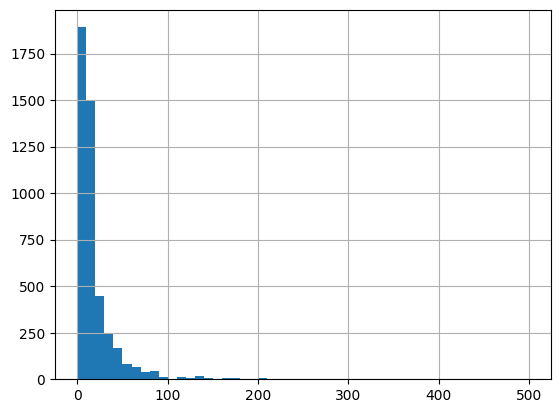

In [215]:
df['price'].hist(bins=50)

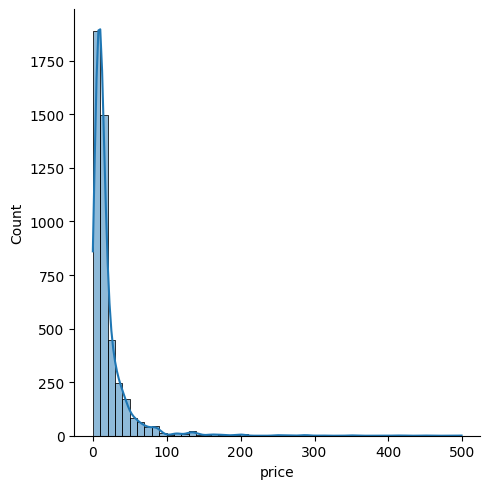

In [216]:
sns.displot(df['price'], bins=50, kde=True)


In [217]:
df.shape

(4576, 11)

In [ ]:
# Lọc các dữ liệu price ngoại lai bằng z-score
sub_df = df[["published_date", "location", "home_type", "price",
              "area", "bedroom", "wc", "legal_status", "furniture"]]
sub_df["z_score_price"] = stats.zscore(df["price"])
sub_df = sub_df[(abs(sub_df["z_score_price"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/2354493381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_price"] = stats.zscore(df["price"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.503658
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.518602
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.636848
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.570567
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.533207
...,...,...,...,...,...,...,...,...,...,...
4570,30/10/2025,"Đống Đa, Hà Nội",nhà mặt phố,32.00,62.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Cơ bản,0.422876
4571,30/10/2025,"Cầu Giấy, Hà Nội",nhà riêng,9.00,37.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.358293
4573,30/10/2025,"Long Biên, Hà Nội",nhà riêng,25.00,75.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Đầy đủ,0.185129
4574,30/10/2025,"Tây Hồ, Hà Nội",nhà riêng,18.30,62.0,6.0,6.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.042429


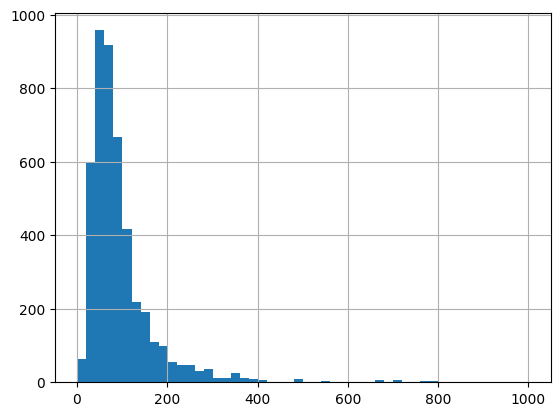

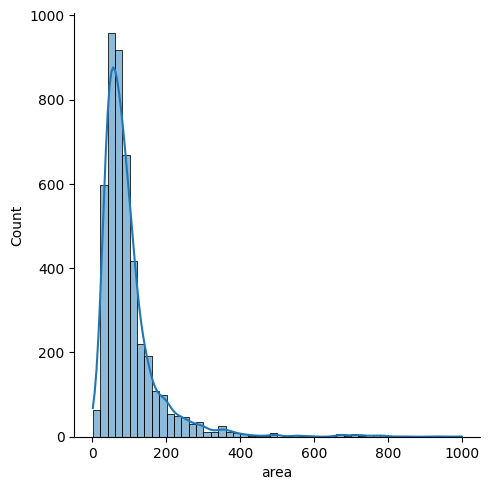

In [219]:
df["area"].hist(bins=50)
sns.displot(df['area'], bins=50, kde=True)

In [220]:
# Lọc các dữ liệu ngoại lai area bằng z-score
sub_df["z_score_area"] = stats.zscore(sub_df["area"])
sub_df = sub_df[(abs(sub_df["z_score_area"]) <= 3)]
sub_df

,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.503658,-0.243114
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.518602,-0.279818
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.636848,2.362875
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.570567,-0.634624
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.533207,-0.940491
...,...,...,...,...,...,...,...,...,...,...,...
4570,30/10/2025,"Đống Đa, Hà Nội",nhà mặt phố,32.00,62.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Cơ bản,0.422876,-0.402165
4571,30/10/2025,"Cầu Giấy, Hà Nội",nhà riêng,9.00,37.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.358293,-0.708032
4573,30/10/2025,"Long Biên, Hà Nội",nhà riêng,25.00,75.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Đầy đủ,0.185129,-0.243114
4574,30/10/2025,"Tây Hồ, Hà Nội",nhà riêng,18.30,62.0,6.0,6.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.042429,-0.402165


In [221]:
# Lọc các dữ liệu ngoại lai wc bằng z-score
sub_df["z_score_wc"] = stats.zscore(sub_df["wc"])
sub_df = sub_df[(abs(sub_df["z_score_wc"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/2644475254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_wc"] = stats.zscore(sub_df["wc"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area,z_score_wc
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.503658,-0.243114,-0.472980
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.518602,-0.279818,-0.184729
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.636848,2.362875,-0.184729
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.570567,-0.634624,-0.184729
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.533207,-0.940491,-0.761230
...,...,...,...,...,...,...,...,...,...,...,...,...
4570,30/10/2025,"Đống Đa, Hà Nội",nhà mặt phố,32.00,62.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Cơ bản,0.422876,-0.402165,0.391772
4571,30/10/2025,"Cầu Giấy, Hà Nội",nhà riêng,9.00,37.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.358293,-0.708032,-0.184729
4573,30/10/2025,"Long Biên, Hà Nội",nhà riêng,25.00,75.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Đầy đủ,0.185129,-0.243114,0.391772
4574,30/10/2025,"Tây Hồ, Hà Nội",nhà riêng,18.30,62.0,6.0,6.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.042429,-0.402165,0.680023


In [222]:
# Lọc các dữ liệu ngoại lai bedroom bằng z-score
sub_df["z_score_bedroom"] = stats.zscore(sub_df["bedroom"])
sub_df = sub_df[(abs(sub_df["z_score_bedroom"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/2568147042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_bedroom"] = stats.zscore(sub_df["bedroom"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area,z_score_wc,z_score_bedroom
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.503658,-0.243114,-0.472980,-0.246702
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.518602,-0.279818,-0.184729,-0.246702
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.636848,2.362875,-0.184729,-0.246702
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.570567,-0.634624,-0.184729,-1.218015
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.533207,-0.940491,-0.761230,-0.732359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,30/10/2025,"Đống Đa, Hà Nội",nhà mặt phố,32.00,62.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Cơ bản,0.422876,-0.402165,0.391772,0.238954
4571,30/10/2025,"Cầu Giấy, Hà Nội",nhà riêng,9.00,37.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.358293,-0.708032,-0.184729,-0.246702
4573,30/10/2025,"Long Biên, Hà Nội",nhà riêng,25.00,75.0,4.0,5.0,Sổ đỏ/ Sổ hồng,Đầy đủ,0.185129,-0.243114,0.391772,0.238954
4574,30/10/2025,"Tây Hồ, Hà Nội",nhà riêng,18.30,62.0,6.0,6.0,Sổ đỏ/ Sổ hồng,Cơ bản,-0.042429,-0.402165,0.680023,1.210267


In [223]:
sub_df["furniture"].value_counts()

furniture
Không có - Thiếu                                1898
Đầy đủ                                          1378
Cơ bản                                           461
Không nội thất                                   111
Đầy đủ.                                           68
                                                ... 
3 điều hòa tủ bếp tủ quần áo âm tường              1
Thô hoàn thiện mặt ngoài hoặc full nội thất.       1
Nội thất đẹp, bố trí hợp lý.                       1
Đầy đủ nội thất.                                   1
Bàn giao nội thất cơ bản.                          1
Name: count, Length: 174, dtype: int64

In [ ]:
s = sub_df["furniture"].astype(str).str.lower()

conds = [
    s.str.contains(r'\bđầy đủ\b|full', regex=True),
    s.str.contains(r'\b(không|ko|k0)\b', regex=True) 
    | s.str.contains(r'(^|[^a-zA-ZÀ-ỹ])k([^a-zA-ZÀ-ỹ]|$)', regex=True),
    s.str.contains(r'cao cấp|luxury', regex=True),
    s.str.contains(r'đồ\s*cơ\s*bản|cơ\s*bản', regex=True),
]
choices = ["Đầy đủ", "Không có - Thiếu", "Cao cấp", "Cơ bản"]

sub_df["furniture"] = np.select(conds, choices, default="Cơ bản")
sub_df["furniture"].value_counts()

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/1769015434.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s.str.contains(r'\b(không|ko|k0)\b', regex=True) | s.str.contains(r'(^|[^a-zA-ZÀ-ỹ])k([^a-zA-ZÀ-ỹ]|$)', regex=True),
/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/1769015434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["furniture"] = np.select(conds, choices, default="Cơ bản")


furniture
Không có - Thiếu    2020
Đầy đủ              1634
Cơ bản               585
Cao cấp               28
Name: count, dtype: int64

In [225]:
sub_df["legal_status"].value_counts()

legal_status
Sổ đỏ/ Sổ hồng                                             3061
Không có - Thiếu                                            522
Hợp đồng mua bán                                            316
Sổ đỏ/ Sổ hồng.                                             155
Sổ đỏ                                                        99
Đang chờ sổ                                                  21
Sổ đỏ.                                                       15
Sổ đỏ chính chủ.                                              7
Sổ đỏ chính chủ                                               7
Có sổ.                                                        5
Hợp đồng mua bán.                                             5
Có sổ đỏ                                                      4
Đang chờ sổ.                                                  4
THANH XUÂN!                                                   3
Có sổ                                                         3
Sổ hồng                    

In [ ]:
s = sub_df["legal_status"].astype(str).str.lower()

conds = [
    s.str.contains(r"sổ\s*đỏ|sổ\s*hồng", regex=True),
    s.str.contains(r"\d+\s*năm", regex=True) | s.str.contains(r"lâu dài", regex=True),
    s.str.contains(r"chính chủ", regex=True) | s.str.contains(r"\bcc\b", regex=True),
]

choices = [
    "có sổ đỏ/sổ hồng",
    "có sổ đỏ/sổ hồng",
    "có sổ đỏ/sổ hồng",
]

sub_df["legal_status"] = np.select(
    conds,
    choices,
    default="không có - Thiếu"
)

sub_df["legal_status"].value_counts()


/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/3546224749.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["legal_status"] = np.select(


legal_status
có sổ đỏ/sổ hồng    3379
không có - Thiếu     888
Name: count, dtype: int64

In [ ]:
# nếu home_type là đất thì bedroom và wc = 0
sub_df.loc[sub_df['home_type'].str.lower().str.contains('đất'),
            ['bedroom','wc']] = 0
sub_df.shape

(4267, 13)

In [228]:
sub_df

,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area,z_score_wc,z_score_bedroom
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,có sổ đỏ/sổ hồng,Đầy đủ,-0.503658,-0.243114,-0.472980,-0.246702
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,0.0,0.0,không có - Thiếu,Không có - Thiếu,-0.518602,-0.279818,-0.184729,-0.246702
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,không có - Thiếu,Không có - Thiếu,0.636848,2.362875,-0.184729,-0.246702
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,có sổ đỏ/sổ hồng,Không có - Thiếu,-0.570567,-0.634624,-0.184729,-1.218015
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,có sổ đỏ/sổ hồng,Không có - Thiếu,-0.533207,-0.940491,-0.761230,-0.732359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,30/10/2025,"Đống Đa, Hà Nội",nhà mặt phố,32.00,62.0,4.0,5.0,có sổ đỏ/sổ hồng,Cơ bản,0.422876,-0.402165,0.391772,0.238954
4571,30/10/2025,"Cầu Giấy, Hà Nội",nhà riêng,9.00,37.0,3.0,3.0,có sổ đỏ/sổ hồng,Cơ bản,-0.358293,-0.708032,-0.184729,-0.246702
4573,30/10/2025,"Long Biên, Hà Nội",nhà riêng,25.00,75.0,4.0,5.0,có sổ đỏ/sổ hồng,Đầy đủ,0.185129,-0.243114,0.391772,0.238954
4574,30/10/2025,"Tây Hồ, Hà Nội",nhà riêng,18.30,62.0,6.0,6.0,có sổ đỏ/sổ hồng,Cơ bản,-0.042429,-0.402165,0.680023,1.210267


In [229]:
sub_df.duplicated().sum()
#giữ lại 1 bản ghi
sub_df = sub_df.drop_duplicates(keep='first')
sub_df.shape

(3130, 13)

In [230]:
sub_df.drop(columns=["z_score_price", "z_score_area", "z_score_wc", "z_score_bedroom"],
            inplace=True)

sub_df.to_csv("sample/bds_hn_data_cleaned.csv", index=False)


/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_47014/704840360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["z_score_price", "z_score_area", "z_score_wc", "z_score_bedroom"],
